In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
date = '2017-08-23'

In [23]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23',)


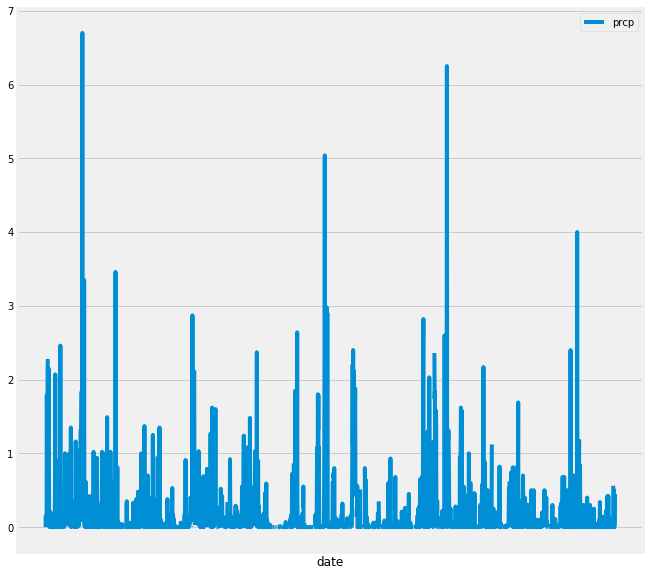

In [36]:
query = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>'2016-08-22').order_by(Measurement.date).all()
df = pd.DataFrame(query, columns=['date','prcp'])
df.set_index('date', inplace=True)
df.sort_values(by = ['date'])
df.plot(figsize=(10,10))
#df.plot.bar()
#plt.tight_layout()
plt.xticks([])
#df.plot(figsize=(10,10))
plt.show()



In [37]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [43]:
station_count= session.query(func.count(Measurement.station)).all()

station_count

[(19550)]

In [44]:
station_freq = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
station_freq 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
station_data=session.query(Measurement.station,func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.max(Measurement.tobs)).all()
station_data

[('USC00518838', 83.0, 58.0, 72.72407045009784),
 ('USC00516128', 84.0, 58.0, 70.91500765696784),
 ('USC00513117', 85.0, 59.0, 72.68918420081211),
 ('USC00514830', 85.0, 58.0, 74.8732970027248),
 ('USC00519281', 85.0, 54.0, 71.66378066378067),
 ('USC00519523', 85.0, 56.0, 74.5436493068565),
 ('USC00511918', 87.0, 53.0, 71.61596766043456),
 ('USC00517948', 87.0, 58.0, 74.68440233236151),
 ('USC00519397', 87.0, 56.0, 74.55323054331865)]

In [56]:
station_date=session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()
station_date

('2017-08-18')

In [66]:
query_station = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>'2016-08-17',Measurement.station=='USC00519281').\
order_by(Measurement.date).all()
query_station

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

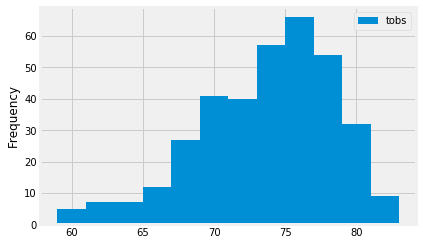

In [68]:
df_station = pd.DataFrame(query_station , columns=['date','tobs'])
df_station.set_index('date', inplace=True)
df_station.sort_values(by = ['tobs'])
df_station.plot.hist(bins=12)
plt.show()

In [13]:
for row in session.query(Measurement):
    print(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373AAF9CF8>, 'id': 1, 'prcp': 0.08, 'station': 'USC00519397', 'tobs': 65.0, 'date': '2010-01-01'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373AAF9B00>, 'id': 2, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 63.0, 'date': '2010-01-02'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373AAF9CC0>, 'id': 3, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 74.0, 'date': '2010-01-03'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373A435860>, 'id': 4, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 76.0, 'date': '2010-01-04'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373AB4B940>, 'id': 5, 'prcp': None, 'station': 'USC00519397', 'tobs': 73.0, 'date': '2010-01-06'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373AB4B5F8>, 'id': 6, 'prcp': 0.06, 'station': 'USC

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B5434A8>, 'id': 2415, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 79.0, 'date': '2016-10-13'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B543550>, 'id': 2416, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 80.0, 'date': '2016-10-14'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B5435F8>, 'id': 2417, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 79.0, 'date': '2016-10-15'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B5436A0>, 'id': 2418, 'prcp': 0.0, 'station': 'USC00519397', 'tobs': 78.0, 'date': '2016-10-16'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B543748>, 'id': 2419, 'prcp': 0.01, 'station': 'USC00519397', 'tobs': 78.0, 'date': '2016-10-17'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B5437F0>, 'id': 2420, 'prcp': 0.0,

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B8189E8>, 'id': 4415, 'prcp': 0.02, 'station': 'USC00513117', 'tobs': 75.0, 'date': '2014-09-17'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B818A90>, 'id': 4416, 'prcp': 0.2, 'station': 'USC00513117', 'tobs': 74.0, 'date': '2014-09-18'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B818B38>, 'id': 4417, 'prcp': 0.13, 'station': 'USC00513117', 'tobs': 73.0, 'date': '2014-09-19'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B818BE0>, 'id': 4418, 'prcp': 0.23, 'station': 'USC00513117', 'tobs': 76.0, 'date': '2014-09-20'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B818C88>, 'id': 4419, 'prcp': 0.0, 'station': 'USC00513117', 'tobs': 76.0, 'date': '2014-09-21'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373B818D30>, 'id': 4420, 'prcp': 0.

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BBA7BE0>, 'id': 6914, 'prcp': 0.0, 'station': 'USC00514830', 'tobs': 77.0, 'date': '2015-04-23'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BBA7C88>, 'id': 6915, 'prcp': 0.08, 'station': 'USC00514830', 'tobs': 77.0, 'date': '2015-04-24'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BBA7D30>, 'id': 6916, 'prcp': 0.0, 'station': 'USC00514830', 'tobs': 83.0, 'date': '2015-04-25'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BBA7DD8>, 'id': 6917, 'prcp': 0.0, 'station': 'USC00514830', 'tobs': 80.0, 'date': '2015-04-26'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BBA7E80>, 'id': 6918, 'prcp': 0.65, 'station': 'USC00514830', 'tobs': 76.0, 'date': '2015-04-27'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BBA7F28>, 'id': 6919, 'prcp': 0.0

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BF34E80>, 'id': 9414, 'prcp': 0.26, 'station': 'USC00518838', 'tobs': 78.0, 'date': '2012-08-06'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BF34F28>, 'id': 9415, 'prcp': None, 'station': 'USC00518838', 'tobs': 75.0, 'date': '2012-08-24'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BF34FD0>, 'id': 9416, 'prcp': None, 'station': 'USC00518838', 'tobs': 74.0, 'date': '2012-09-14'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BF3F0B8>, 'id': 9417, 'prcp': None, 'station': 'USC00518838', 'tobs': 77.0, 'date': '2012-09-17'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BF3F160>, 'id': 9418, 'prcp': None, 'station': 'USC00518838', 'tobs': 79.0, 'date': '2012-09-21'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373BF3F208>, 'id': 9419, 'prcp': 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C2CC0B8>, 'id': 11913, 'prcp': 0.02, 'station': 'USC00519523', 'tobs': 78.0, 'date': '2016-10-26'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C2CC160>, 'id': 11914, 'prcp': 0.08, 'station': 'USC00519523', 'tobs': 78.0, 'date': '2016-10-27'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C2CC208>, 'id': 11915, 'prcp': 0.06, 'station': 'USC00519523', 'tobs': 78.0, 'date': '2016-10-28'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C2CC2B0>, 'id': 11916, 'prcp': 0.01, 'station': 'USC00519523', 'tobs': 78.0, 'date': '2016-10-29'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C2CC358>, 'id': 11917, 'prcp': 0.0, 'station': 'USC00519523', 'tobs': 79.0, 'date': '2016-10-30'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C2CC400>, 'id': 11918, 'pr

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C5A35F8>, 'id': 13913, 'prcp': 0.09, 'station': 'USC00519281', 'tobs': 75.0, 'date': '2014-09-27'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C5A36A0>, 'id': 13914, 'prcp': 0.26, 'station': 'USC00519281', 'tobs': 73.0, 'date': '2014-09-28'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C5A3748>, 'id': 13915, 'prcp': 0.55, 'station': 'USC00519281', 'tobs': 73.0, 'date': '2014-09-29'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C5A37F0>, 'id': 13916, 'prcp': 0.3, 'station': 'USC00519281', 'tobs': 71.0, 'date': '2014-09-30'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C5A3898>, 'id': 13917, 'prcp': 4.0, 'station': 'USC00519281', 'tobs': 70.0, 'date': '2014-10-01'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002373C5A3940>, 'id': 13918, 'prc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
data =pd.read_sql("SELECT * FROM hawaii",conn)
#for record in data:
    #print(record)
data.head()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [69]:
pwd


'C:\\Users\\tolania\\OneDrive - Amni International Petroleum Company\\Desktop\\sqlalchemy\\10-Advanced-Data-Storage-and-Retrieval\\Instructions'